**Práctica 7: Regresión múltiple con statsmodels**

Esta práctica sigue en la misma onda que la sexta, pero ahora los modelos lineales tendrán más de un factor modelando conjuntamente la variable de interés, tipo y = f(x1, x2, ..., xn) = a1 x1 + a2 x2 + ... + an xn + b. 

Vamos a seguir separando los alumnos de Moisés de los alumnos de Elisa, analizando únicamente los alumnos que se esforzaron (en fases futuras tendremos que reincorporar la población B para lograr identificar, si es posible, por qué no se esforzaron), ya que sabemos de fases anteriores que los de Moisés y los de Elisa son claramente poblaciones distintas.

Intentemos primero el efecto combinado de horas de trabajo semanales y las tres estimaciones de las encuestas. 

In [9]:
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
eli = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]]) # discretas con elisa
x = o.loc[o.profe == 'moi']
moi = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]]) # materiales con moi

for datos in [eli, moi]:
    d = pd.DataFrame(datos, columns = ["CF1op", "hrsNum", "eI", "eM", "eF"])
    d = d.dropna() # ignoremos renglones que contienen por lo menos un NaN para estos campos
    n = len(d)
    if n >= 8: # no se puede con menos de ocho
        y = d["CF1op"]
        x = d[["hrsNum", "eI", "eM", "eF"]]
        x = sm.add_constant(x) # para contar con la b en nuestra f()
        m = sm.OLS(y, x).fit() 
        print(datos.profe.unique()[0])
        print(m.summary())

elisa
                            OLS Regression Results                            
Dep. Variable:                  CF1op   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     21.20
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           3.85e-13
Time:                        10:00:55   Log-Likelihood:                -409.63
No. Observations:                 121   AIC:                             829.3
Df Residuals:                     116   BIC:                             843.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2700     11.585     -0.023   

Pues, no hubo suficientes alumnos de Moisés que hubieran contestado las tres encuestas, y como además la salida del modelo para los de Elisa indice collinealidad múltiple, mejor chequemos si los estimados eI, eM y eF estén muy correlacionados entre ellos; jamás conviene incluir en un modelo como x columnas que son fuertemente correlacionadas entre sí. 

           CF1op    hrsNum        eI        eM        eF
CF1op   1.000000 -0.168201  0.274874  0.522520  0.475618
hrsNum -0.168201  1.000000  0.058195  0.025997  0.012158
eI      0.274874  0.058195  1.000000  0.357854  0.258988
eM      0.522520  0.025997  0.357854  1.000000  0.294099
eF      0.475618  0.012158  0.258988  0.294099  1.000000
           CF1op    hrsNum        eI        eM        eF
CF1op   1.000000 -0.224490  0.564954  0.588872  0.978530
hrsNum -0.224490  1.000000  0.662266  0.324443 -0.229416
eI      0.564954  0.662266  1.000000  0.816497  0.577350
eM      0.588872  0.324443  0.816497  1.000000  0.707107
eF      0.978530 -0.229416  0.577350  0.707107  1.000000


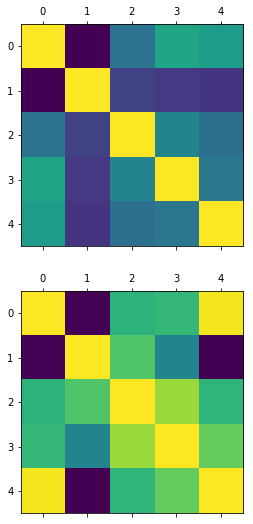

In [37]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
eli = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]]) # discretas con elisa
x = o.loc[o.profe == 'moi']
moi = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]]) # materiales con moi

f = plt.figure()  
d = eli
d = pd.DataFrame(d, columns = ["CF1op", "hrsNum", "eI", "eM", "eF"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(211)
tmp = sf.matshow(d.corr())

d = moi
d = pd.DataFrame(d, columns = ["CF1op", "hrsNum", "eI", "eM", "eF"])
d = d.dropna() 
print(d.corr())
sf = f.add_subplot(212)
tmp = sf.matshow(d.corr())

Oh, wow. En el caso de Moisés, los alumnos que sí dieron un estimado en la encuesta final correlacionaron muy fuertemente con la calificación actual. Urge ver una gráfica de dispersión.

4


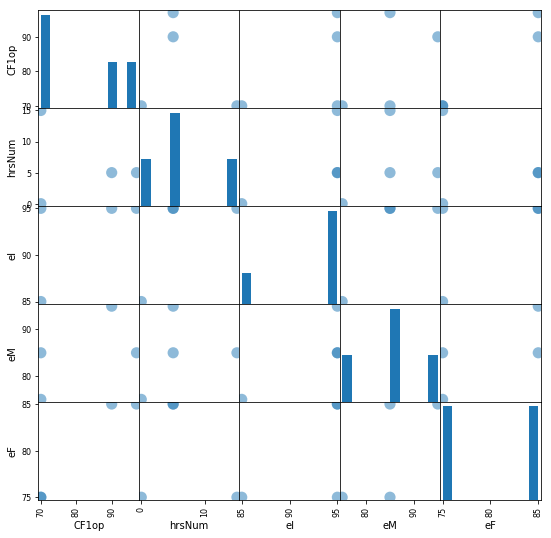

In [43]:
import matplotlib.pyplot as plt
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'moi']
d = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]])
d = pd.DataFrame(d, columns = ["CF1op", "hrsNum", "eI", "eM", "eF"])
d = d.dropna()
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (9, 9), s = 500) 

Pues, son solamente cuatro personas. No podemos concluir gran cosa de que esos cuatro hayan estimado bien.

Para los alumnos de Elisa, ninguna correlación es muy fuerte. Revisitemos la salida para ver si podemos mejorar el modelo además de visualizar las gráficas de dispersión para ellos también.

121
                            OLS Regression Results                            
Dep. Variable:                  CF1op   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     21.20
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           3.85e-13
Time:                        10:52:28   Log-Likelihood:                -409.63
No. Observations:                 121   AIC:                             829.3
Df Residuals:                     116   BIC:                             843.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2700     11.585     -0.023     

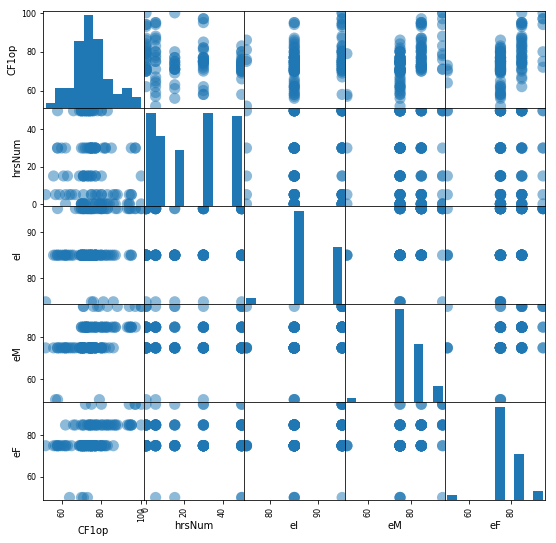

In [45]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
d = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]])
d = pd.DataFrame(d, columns = ["CF1op", "hrsNum", "eI", "eM", "eF"])
d = d.dropna()
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (9, 9), s = 500) 
y = d["CF1op"]
x = d[["hrsNum", "eI", "eM", "eF"]]
x = sm.add_constant(x) 
m = sm.OLS(y, x).fit()  
print(m.summary())


Los estimados a la mitad y al final terminan con pendientes estadísticamente significativos. Lo de horas trabajadas también entra con un nivel de significado 0.01, pero la constante b no es significante, ni el estimado inicial. Al rato repetimos el modelo sin ellos, viendo si ayuda agregar alguna otra información.

Estaría más fácil todo si se les preguntara exactamente qué calificación piensan obtener, pero dudo que alumnos sepan decir eso en vez de elegir rangos de diez puntos.

De hecho, cuando llegan a presentar exámenes, les pregunto justamente cuántos puntos, exactamente, de los veinte totales piensan sacar. Lo pregunto actualmente tres veces: entrando al examen, después de haber leído las preguntas y cuando entregan su examen. Al inicio preguntaba dos veces: entrando y saliendo.

Vamos a ver este mismo tipo de gráfica y modelo para esos datos para que se aprecie lo que se gana cuando los datos no estén así discretizados de manera tan cruda.

Usaré datos de agosto-diciembre 2018, donde además aparece a qué hora entró el alumno a presentar y a qué hora entregó su examen; podemos contar cuánto tipo estuvo en el salón.

In [ ]:
head -n 3 estimados/ord_ad18.dat 
00312 12:05 12 13 12 14:24
01473 12:01 15 17 18 13:41
03874 09:45 17 16 17 11:17
head -n 3 actividades/ord_ad18.dat | cut -c 3-
05000 eo- eo3 eo5 eo0_1_2
52814 eo- eo4 eo4 eo0
80354 eo- eo3_1_4 eo7 eo1_1_2

Habrá que combinar estos dos, sumando los puntos de la segunda. (Sí, me encanta batallar con las fracciones para evitar redondeos decimales.)

El siguiente código no es ejecutable en jupyter ya que los archivos en cuestión no están disponibles (por contener las matrículas completas, no es una buena idea divulgarlas). Lo pongo en estres.py para sacar de ahí los datos que ya no contienen nada de información personal o confidencial.

In [ ]:
def value(descr):
    points = 0
    if '_' in descr:
        parts = descr.split('_')
        if len(parts) == 2:
            up = int(parts.pop(0))
            down = int(parts.pop(0))
            value = up / (1.0 * down)
            points += float(value)
        else:
            assert len(parts) == 3
            whole = int(parts.pop(0))
            up = int(parts.pop(0))
            down = int(parts.pop(0))
            value = whole + up / (1.0 * down)
            points += float(value)
    elif descr != '-':
        points += float(descr)
    return points

def match(suffix, candidates):
    k = 7 - len(suffix)
    for c in candidates:
        if c[k:] == suffix:
            return c
    return None

results = dict()
with open('actividades/ord_ad18.dat') as data:
    for line in data:
        tokens = (line.strip()).split()
        matr = tokens.pop(0)
        pts = sum([value(q[2:]) for q in tokens])
        results[matr] = pts

from datetime import datetime
f = '%H:%M'
matriculas = results.keys()
with open('estimados/ord_ad18.dat') as data:
    for line in data:
        tokens = (line.strip()).split()
        m = match(tokens.pop(0), matriculas)
        hEntry = datetime.strptime(tokens.pop(0), f) # hora de entrada                                                                                                                                                   
        hExit = datetime.strptime(tokens.pop(), f) # hora de salida                                                                                                                                                      
        print(results[m], int((hExit - hEntry).seconds / 60), ' '.join(tokens))

In [ ]:
python3 estres.py > est.csv
head -n3 est.csv 
5.25 139 12 13 12
22.0 100 15 17 18
11.0 92 17 16 17

83
                            OLS Regression Results                            
Dep. Variable:                 puntos   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     19.07
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           5.66e-11
Time:                        11:48:00   Log-Likelihood:                -222.68
No. Observations:                  83   AIC:                             455.4
Df Residuals:                      78   BIC:                             467.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4272      3.176     -0.449      

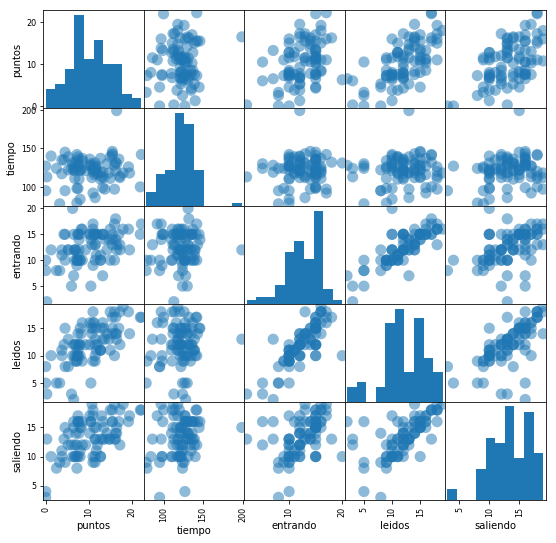

In [48]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/est.csv", sep = " ", header = None)
d.columns = ['puntos', 'tiempo', 'entrando', 'leidos', 'saliendo']
print(len(d))
tmp = pd.plotting.scatter_matrix(d, figsize = (9, 9), s = 500) 
y = d["puntos"]
x = d[['tiempo', 'entrando', 'leidos', 'saliendo']]
x = sm.add_constant(x) 
m = sm.OLS(y, x).fit() 
print(m.summary())

En este caso, el pendiente significativo es el de estimar después de haber leído las preguntas. Se nota que están mayormente positivamente correlacionados los estimados por como se acomodan de manera diagonal las gráficas de dispersión. El cuanto rato pasan en el salón no parece afectar de manera sistemática los puntos obtenidos.

            puntos    tiempo  entrando    leidos  saliendo
puntos    1.000000  0.116739  0.418442  0.659091  0.570673
tiempo    0.116739  1.000000  0.084536  0.094607  0.220853
entrando  0.418442  0.084536  1.000000  0.798718  0.449719
leidos    0.659091  0.094607  0.798718  1.000000  0.646238
saliendo  0.570673  0.220853  0.449719  0.646238  1.000000


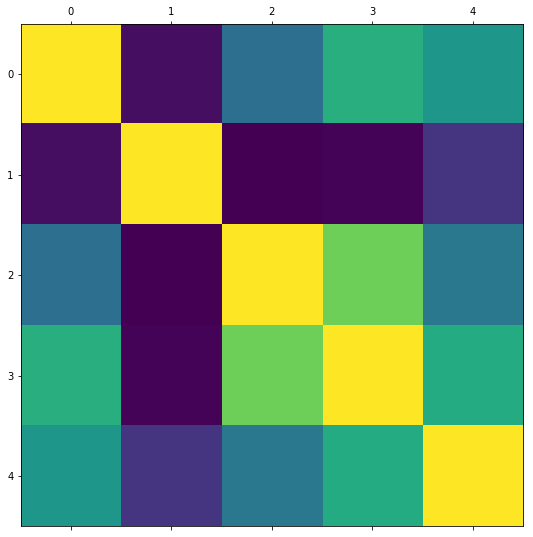

In [49]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/est.csv", sep = " ", header = None)
d.columns = ['puntos', 'tiempo', 'entrando', 'leidos', 'saliendo']
print(d.corr())
plt.matshow(d.corr())

Revisitemos ahora lo del modelo original, quitando los aspectos no significativos.

                            OLS Regression Results                            
Dep. Variable:                  CF1op   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4506.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):          4.06e-123
Time:                        11:54:31   Log-Likelihood:                -416.10
No. Observations:                 123   AIC:                             838.2
Df Residuals:                     120   BIC:                             846.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hrsNum        -0.0937      0.034     -2.746      0.0

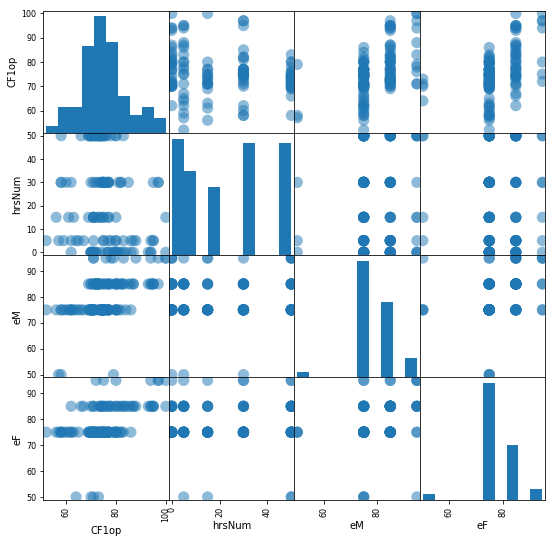

In [51]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
d = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]])
d = pd.DataFrame(d, columns = ["CF1op", "hrsNum", "eM", "eF"])
d = d.dropna()
tmp = pd.plotting.scatter_matrix(d, figsize = (9, 9), s = 500) 
y = d["CF1op"]
x = d[["hrsNum", "eM", "eF"]]
m = sm.OLS(y, x).fit() 
print(m.summary())

Este modelo es muy bueno, el R^2 está por encima de nueve. Vamos a comparar las verdaderas calificaciones de primera oportunidad con los que otorga el modelo, viendo los diez mejores y los diez peores pronósticos y checanco cuánta gente estaba a un punto, cinco puntos o diez puntos de su resultado verdadero.

In [86]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
d = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]])
d = pd.DataFrame(d, columns = ["CF1op", "hrsNum", "eM", "eF"])
d = d.dropna()
y = d["CF1op"]
x = d[["hrsNum", "eM", "eF"]]
m = sm.OLS(y, x).fit() 
comp = pd.DataFrame(d, columns = ["CF1op"])
comp['pron'] = m.predict(x) 
comp['error'] = comp.CF1op - comp.pron
comp['absE'] = pd.DataFrame.abs(comp['error'])
orden = comp.sort_values(by = ['absE'])
mejores = orden.head(10)
mejores.insert(0, 'tipo', 'mejores')
peores = orden.tail(10)
peores.insert(0, 'tipo', 'peores')
pd.concat([mejores, peores])
n = len(comp)
for e in [1, 5, 10]:
    k = sum(comp.absE < e)
    print(k, "de", n , "= {:.2f}% estuvieron dentro de".format(100 * k / n), e, "punto del CF correcto")

15 de 123 = 12.20% estuvieron dentro de 1 punto del CF correcto
72 de 123 = 58.54% estuvieron dentro de 5 punto del CF correcto
97 de 123 = 78.86% estuvieron dentro de 10 punto del CF correcto


Vamos a ver qué tanto cambia si no usamos el estimado al final del semestre; estaría más padre poder saber cómo le irá al estudiante cuando apenas estamos a la mitad del semestre.

Contemos además cuántos de los que pasan segun el modelo, pasan en el mundo real y vice versa, para sacar una matriz de clasificación sobre los
* fp = falsos positivos: según el modelo pasan, pero en realidad no pasan
* fn = falsos negativos: según el modelo reprueban, pero en realidad pasan
* tp = verdaderos positivos: pasan en la realidad y también según el modelo
* tn = verdaderos negativos: reprueban en la realidad y también según el modelo

Teniendo tt = tp + tn + fp + fn podemos calcular
* la sensibilidad: tp / (tp + fn) que mide qué tan bien se modela los que aprueban
* la especificidad: tn / (tn + fp) que mide qué tan bien se modela los que reprueban
* la precisión: (tp + tn) / tt que mide el desempeño total de las asignaciones correctas
de la clasificación que concluimos de este modelo lineal de regresión múltiple.

In [103]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
d = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]])
d = pd.DataFrame(d, columns = ["CF1op", "hrsNum", "eM"])
d = d.dropna()
y = d["CF1op"]
x = d[["hrsNum", "eM"]]
m = sm.OLS(y, x).fit() 
print(m.summary())
comp = pd.DataFrame(d, columns = ["CF1op"])
comp['pron'] = m.predict(x) 
comp['error'] = comp.CF1op - comp.pron
comp['absE'] = pd.DataFrame.abs(comp['error'])
orden = comp.sort_values(by = ['absE'])
mejores = orden.head(10)
mejores.insert(0, 'tipo', 'mejores')
peores = orden.tail(10)
peores.insert(0, 'tipo', 'peores')
pd.concat([mejores, peores])
n = len(comp)
for e in [1, 5, 10]:
    k = sum(comp.absE < e)
    print(k, "de", n , "= {:.2f}% estuvieron dentro de".format(100 * k / n), e, \
          "punto{:s} del CF correcto".format("" if e == 1 else "s"))
fp = sum((comp.CF1op < 70) & (comp.pron >= 70))
fn = sum((comp.CF1op >= 70) & (comp.pron < 70))
tp = sum((comp.CF1op >= 70) & (comp.pron >= 70))
tn = sum((comp.CF1op < 70) & (comp.pron < 70))
print('Clasificación')
print(fp, fn, tp, tn)
tt = tp + tn + fp + fn
print('sensibilidad', tp / (tp + fn))
print('especificidad', tn / (tn + fp))
print('precisión', (tp + tn) / tt)

                            OLS Regression Results                            
Dep. Variable:                  CF1op   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     5030.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):          1.56e-132
Time:                        12:38:20   Log-Likelihood:                -518.68
No. Observations:                 144   AIC:                             1041.
Df Residuals:                     142   BIC:                             1047.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hrsNum        -0.0581      0.038     -1.537      0.1

OK, le atina en tres cuatros de los casos con tan poca información: las entradas son solamente "cuántos piensas que sacarás" la semana después de regresar de medio curso y "cuántas horas a la semana trabajas".

Veremos si se mejora esto con algunos de los otros datos que analizábamos en los modelos de regresión lineal sencillas de una sola variable. Agreguemos dos variables binarias que teníamos en la práctica anterior:
* el semestre de ingreso
* tipo de plan de horas de estudio por semana expresada al inicio

In [102]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
d = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]])
d = pd.DataFrame(d, columns = ["CF1op", "hrsNum", "eM", "inicio", "hrsEstudio_ini"])
d.inicio = d.inicio.replace("enero", 0) # ocupan ser números
d.inicio = d.inicio.replace("agosto", 1) 
d.hrsEstudio_ini = d.hrsEstudio_ini.replace(['3-5 h', '2-3 h', '> 5 h', '1-2 h', '< 1 h'], [1, 1, 0, 1, 0]) # 1 ok, 0 loco
d = d.dropna()
print(len(d))
y = d["CF1op"]
x = d[["hrsNum", "eM", "inicio", "hrsEstudio_ini"]]
m = sm.OLS(y, x).fit() 
print(m.summary())
comp = pd.DataFrame(d, columns = ["CF1op"])
comp['pron'] = m.predict(x) 
comp['error'] = comp.CF1op - comp.pron
comp['absE'] = pd.DataFrame.abs(comp['error'])
orden = comp.sort_values(by = ['absE'])
mejores = orden.head(10)
mejores.insert(0, 'tipo', 'mejores')
peores = orden.tail(10)
peores.insert(0, 'tipo', 'peores')
pd.concat([mejores, peores])
n = len(comp)
for e in [1, 5, 10]:
    k = sum(comp.absE < e)
    print(k, "de", n , "= {:.2f}% estuvieron dentro de".format(100 * k / n), e, \
          "punto{:s} del CF correcto".format("" if e == 1 else "s"))
fp = sum((comp.CF1op < 70) & (comp.pron >= 70))
fn = sum((comp.CF1op >= 70) & (comp.pron < 70))
tp = sum((comp.CF1op >= 70) & (comp.pron >= 70))
tn = sum((comp.CF1op < 70) & (comp.pron < 70))
print('Clasificación')
print(fp, fn, tp, tn)
tt = tp + tn + fp + fn
print('sensibilidad', tp / (tp + fn))
print('especificidad', tn / (tn + fp))
print('precisión', (tp + tn) / tt)

127
                            OLS Regression Results                            
Dep. Variable:                  CF1op   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2491.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):          1.22e-116
Time:                        12:38:04   Log-Likelihood:                -449.15
No. Observations:                 127   AIC:                             906.3
Df Residuals:                     123   BIC:                             917.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
hrsNum            -0.0221      0.039    

La especifidad mejoró mucho con el costo de que la sensibilidad bajara un poco. La precisión en sí es similar.

El el reporte de la séptima práctica, incluye por lo menos un modelo de regresión múltiple e intenta usar sus resultados como un clasificador de alguna variable de interés de su proyecto.